In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### <span style='background:yellow'> Look at data, check for any missing values in "years of musical instruction"

In [49]:
df = pd.read_excel('Inperson_Final.xlsx')
df.head()

,Unique id,Age,"Gender [1:F, 2:M]",Musician_years of playing ( >= 5 -> 2 ),Musician_years of instruction ( >= 5 -> 2 ),years of instruction,"L/R Hand [1:R, 2:L]",Vis seq,Vis SD,Aud seq,Aud SD,vib seq,vib SD
0,Pilot 1,21.0,1,1,1,2,1,Difficult,Easy,Difficult,Easy,Difficult,Easy
1,pilot 2,34.0,2,2,2,5,1,Difficult,Difficult,Neutral,Easy,Neutral,Neutral
2,pilot 3,30.0,1,1,1,0,1,Difficult,Easy,Neutral,Easy,Difficult,Easy
3,main 1,18.0,2,1,1,0,1,Easy,Easy,Neutral,Easy,Neutral,Easy
4,main 2,18.0,1,2,1,3,1,Difficult,Neutral,Difficult,Neutral,Neutral,Neutral


In [50]:
# Check see if there is null values in data
df.isnull().sum()

Unique id                                      0
Age                                            2
Gender [1:F, 2:M]                              0
Musician_years of playing ( >= 5 -> 2 )        0
Musician_years of instruction ( >= 5 -> 2 )    0
years of instruction                           0
L/R Hand [1:R, 2:L]                            0
Vis seq                                        0
Vis SD                                         4
Aud seq                                        2
Aud SD                                         1
vib seq                                        1
vib SD                                         2
dtype: int64

### <span style='background:yellow'> Fill the missing values with the most frequent value (mode)

In [51]:
for col in df.columns:
    mode_value = df[col].mode()[0]  # Get most frequent value
    df[col] = df[col].fillna(mode_value)  # Reassign column directly

# Verify no missing values remain
print(df.isnull().sum())


Unique id                                      0
Age                                            0
Gender [1:F, 2:M]                              0
Musician_years of playing ( >= 5 -> 2 )        0
Musician_years of instruction ( >= 5 -> 2 )    0
years of instruction                           0
L/R Hand [1:R, 2:L]                            0
Vis seq                                        0
Vis SD                                         0
Aud seq                                        0
Aud SD                                         0
vib seq                                        0
vib SD                                         0
dtype: int64


### <span style='background:yellow'> Loot at the distribution of musical instruction

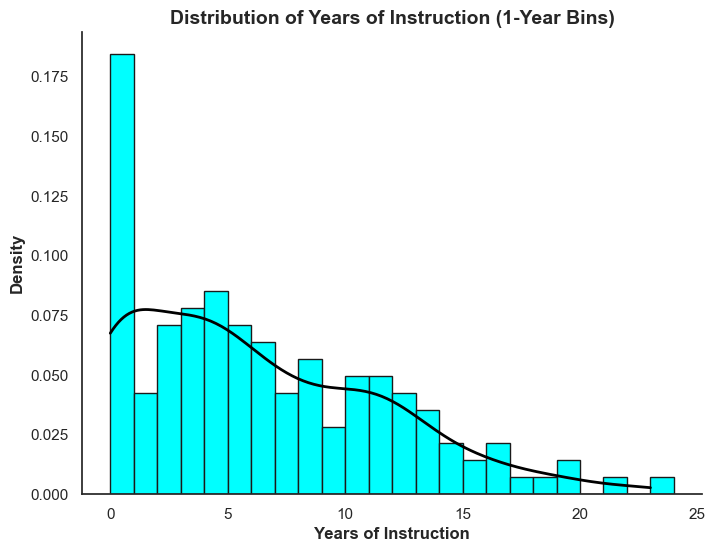

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style='white')

plt.figure(figsize=(8, 6))

# Create bin edges with 1-year width
min_val = int(df['years of instruction'].min())
max_val = int(df['years of instruction'].max())
bins = np.arange(min_val, max_val + 2, 1)  # +2 so last bin includes the max value

# Histogram
sns.histplot(
    data=df,
    x='years of instruction',
    bins=bins,
    stat='density',
    color='cyan',
    alpha=1,
    edgecolor='k'
)

# KDE overlay
sns.kdeplot(
    data=df,
    x='years of instruction',
    color='black',
    linewidth=2,
    bw_adjust=0.8,
    cut=0
)

# Labels and style
plt.xlabel('Years of Instruction', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.title('Distribution of Years of Instruction (1-Year Bins)', fontsize=14, fontweight='bold')
sns.despine()
plt.show()


The distribution of years of instruction is highly right-skewed, with the majority of participants having between 0 and 5 years of training. </br>
A smaller group has 6 to 15 years, while only a few individuals have more than 15 years, indicating a limited number of highly experienced participants.

### <span style='background:yellow'>Look at the years of musical training by gender

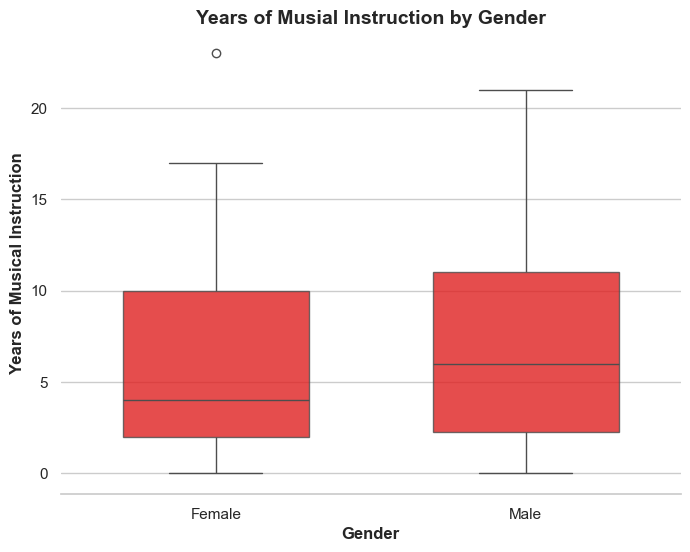

In [53]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender [1:F, 2:M]', y='years of instruction', width=0.6, boxprops=dict(alpha=0.8), color='red')

plt.xlabel('Gender', fontsize=12, fontweight='bold')
plt.ylabel('Years of Musical Instruction', fontsize=12, fontweight='bold')
plt.title('Years of Musial Instruction by Gender', fontsize=14, fontweight='bold')

plt.xticks([0, 1], ['Female', 'Male'], fontsize=11)
plt.yticks(fontsize=11)
sns.despine(left=True)

plt.show()

The boxplot shows that males tend to have slightly more years of musical instruction than females, as indicated by the higher median. </br>
Both genders have a similar range, but males display a wider spread, with some individuals receiving over 20 years of instruction. Females show a slightly lower median and one notable outlier with more than 20 years of training.

### <span style='background:yellow'> See how people rate the difficultly of auditory task based on years of musical instruction

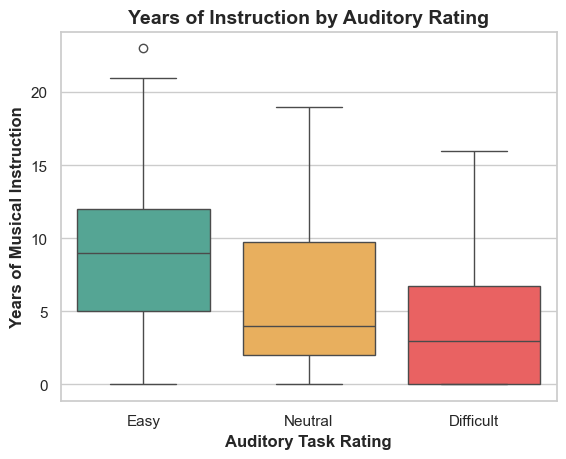

In [59]:
custom_colors = ['#FF4C4C', '#FFB347', '#47B39C']  # Red, Orange, Teal

sns.boxplot(
    data=df,
    x='Aud seq',
    y='years of instruction',
    hue='Aud seq',
    order=['Easy', 'Neutral', 'Difficult'],
    palette=custom_colors,
    legend=False
)

plt.title('Years of Instruction by Auditory Rating', fontsize=14, fontweight='bold')
plt.xlabel('Auditory Task Rating', fontsize=12, fontweight='bold')
plt.ylabel('Years of Musical Instruction', fontsize=12, fontweight='bold')
plt.show()


There is a clear ordinal trend in the data: the more years of musical training, the easier participants rate the auditory task. Those with the highest levels of instruction are concentrated in the "Easy" group, while participants with fewer years of instruction are more frequently found in the "Neutral" and especially the "Difficult" groups.